In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [9]:
# OpenWeatherMap API Key
api_key = "d737271a90205b3f347b07b64f68ca21"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        cityweather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_latitude = cityweather["coord"]["lat"]
        city_longitude = cityweather["coord"]["lon"]
        max_temp = cityweather["main"]["temp_max"]
        humidity = cityweather["main"]["humidity"]
        clouds = cityweather["clouds"]["all"]
        wind = cityweather["wind"]["speed"]
        country = cityweather["sys"]["country"]
        date = cityweather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_latitude, 
                          "Lng": city_longitude, 
                          "Max Temp": max_temp,
                          "Humidity": humidity,
                          "Cloudiness": clouds,
                          "Wind Speed": wind,
                          "Country": country,
                          "Date": date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dayong
Processing Record 2 of Set 1 | yakshur-bodya
City not found. Skipping...
Processing Record 3 of Set 1 | eregli
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | auki
Processing Record 8 of Set 1 | broome
Processing Record 9 of Set 1 | yershov
City not found. Skipping...
Processing Record 10 of Set 1 | honningsvag
Processing Record 11 of Set 1 | tukuran
Processing Record 12 of Set 1 | gold coast
Processing Record 13 of Set 1 | mehamn
Processing Record 14 of Set 1 | lincoln
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | atar
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | saldanha
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Set 1 | tutoia


Processing Record 36 of Set 4 | isangel
Processing Record 37 of Set 4 | leshukonskoye
Processing Record 38 of Set 4 | bosaso
Processing Record 39 of Set 4 | ahipara
Processing Record 40 of Set 4 | coquimbo
Processing Record 41 of Set 4 | samusu
City not found. Skipping...
Processing Record 42 of Set 4 | port lincoln
Processing Record 43 of Set 4 | mao
Processing Record 44 of Set 4 | yar-sale
Processing Record 45 of Set 4 | praia da vitoria
Processing Record 46 of Set 4 | thilogne
City not found. Skipping...
Processing Record 47 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 48 of Set 4 | sao filipe
Processing Record 49 of Set 4 | bengkulu
City not found. Skipping...
Processing Record 0 of Set 5 | mormugao
City not found. Skipping...
Processing Record 1 of Set 5 | maksatikha
Processing Record 2 of Set 5 | sabzevar
Processing Record 3 of Set 5 | bowen
Processing Record 4 of Set 5 | ola
Processing Record 5 of Set 5 | jieshi
Processing Record 6 of Set 5 | berlevag
Pr

City not found. Skipping...
Processing Record 15 of Set 8 | wuwei
City not found. Skipping...
Processing Record 16 of Set 8 | noshiro
City not found. Skipping...
Processing Record 17 of Set 8 | xanlar
City not found. Skipping...
Processing Record 18 of Set 8 | rio gallegos
City not found. Skipping...
Processing Record 19 of Set 8 | caraballeda
City not found. Skipping...
Processing Record 20 of Set 8 | tomigusuku
City not found. Skipping...
Processing Record 21 of Set 8 | bethel
City not found. Skipping...
Processing Record 22 of Set 8 | sorong
City not found. Skipping...
Processing Record 23 of Set 8 | maragogi
City not found. Skipping...
Processing Record 24 of Set 8 | dunedin
City not found. Skipping...
Processing Record 25 of Set 8 | zabol
City not found. Skipping...
Processing Record 26 of Set 8 | sitka
City not found. Skipping...
Processing Record 27 of Set 8 | sao borja
City not found. Skipping...
Processing Record 28 of Set 8 | nhulunbuy
City not found. Skipping...
Processing R

City not found. Skipping...
Processing Record 36 of Set 10 | imeni poliny osipenko
City not found. Skipping...
Processing Record 37 of Set 10 | tourlaville
City not found. Skipping...
Processing Record 38 of Set 10 | klaksvik
City not found. Skipping...
Processing Record 39 of Set 10 | bogorodskoye
City not found. Skipping...
Processing Record 40 of Set 10 | singarayakonda
City not found. Skipping...
Processing Record 41 of Set 10 | angoche
City not found. Skipping...
Processing Record 42 of Set 10 | mollendo
City not found. Skipping...
Processing Record 43 of Set 10 | sanmenxia
City not found. Skipping...
Processing Record 44 of Set 10 | cravo norte
City not found. Skipping...
Processing Record 45 of Set 10 | dudinka
City not found. Skipping...
Processing Record 46 of Set 10 | mossendjo
City not found. Skipping...
Processing Record 47 of Set 10 | puerto ayacucho
City not found. Skipping...
Processing Record 48 of Set 10 | dhidhdhoo
City not found. Skipping...
Processing Record 49 of S

City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------


In [10]:
city_pd = pd.DataFrame(city_data)

lats = city_pd["Lat"]
max_temps = city_pd["Max Temp"]
humidity = city_pd["Humidity"]
cloudiness = city_pd["Cloudiness"]
wind_speed = city_pd["Wind Speed"]

# Export to csv
city_pd.to_csv(output_data_file, index_label="City_ID")

city_pd.count()

City          311
Cloudiness    311
Country       311
Date          311
Humidity      311
Lat           311
Lng           311
Max Temp      311
Wind Speed    311
dtype: int64

In [11]:
city_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,dayong,54,PH,1557970365,66,11.74,122.04,88.22,6.85
1,eregli,0,TR,1557970138,32,37.51,34.05,66.67,6.02
2,ushuaia,40,AR,1557968400,50,-54.81,-68.31,51.80,17.22
3,mataura,100,NZ,1557969606,61,-46.19,168.86,48.00,25.01
4,new norfolk,0,AU,1557970035,66,-42.78,147.06,62.01,10.29


### Latitude v Temp

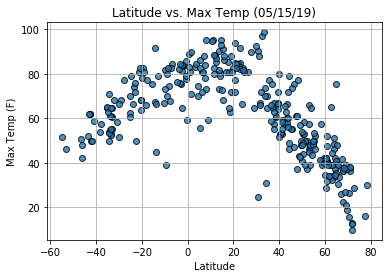

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("Latitude vs. Max Temp (%s)" % time.strftime("%x"))
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output/Fig1.png")

# Show plot
plt.show()

### Latitude v Humidity

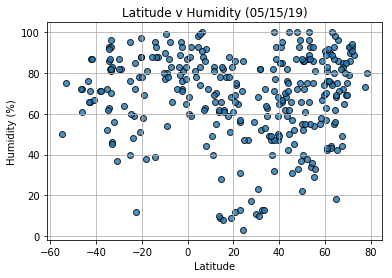

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("Latitude v Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output/Fig2.png")

# Show plot
plt.show()

### Latitude v Cloudiness

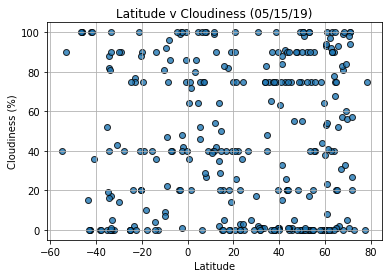

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("Latitude v Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output/Fig3.png")

# Show plot
plt.show()

### Latitude v Wind Speed

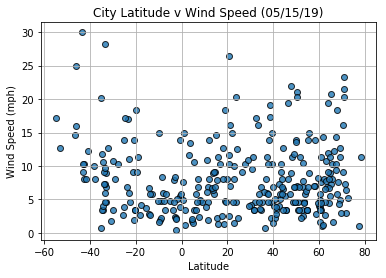

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude v Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output/Fig4.png")

# Show plot
plt.show()